# Prediction using Decision Tree  Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv(r"C:\Users\Admin\Downloads\IRIS.csv")
iris.shape

(150, 5)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
iris['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [14]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [15]:
import seaborn as sns

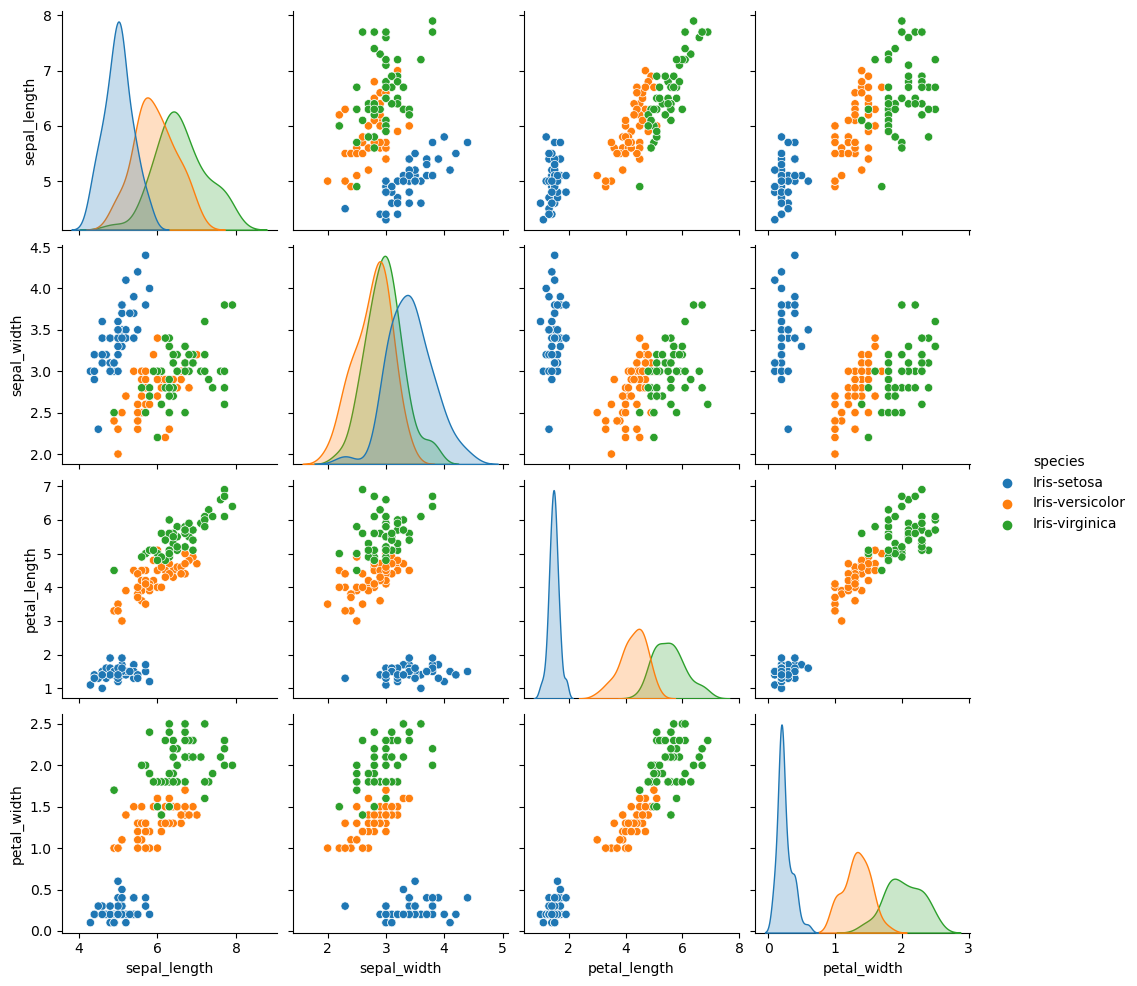

In [18]:
sns.pairplot(iris, hue='species')

In [19]:
iris.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15324\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_15324\1679202494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr())


<Axes: >

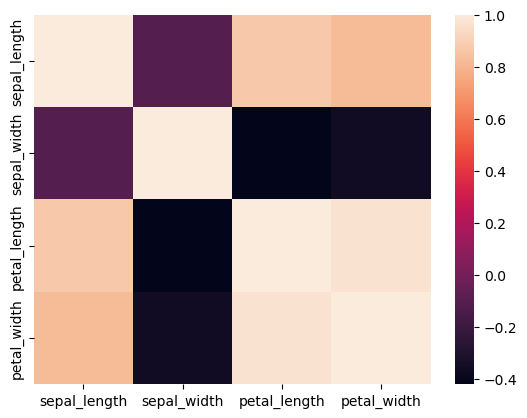

In [21]:
sns.heatmap(iris.corr())

In [23]:
#Data preprocessing
target=iris['species']
df=iris.copy()
df=df.drop('species', axis=1)
df.shape

(150, 4)

In [27]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [28]:

#defingi the attributes and labels
X=iris.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
iris['species']=le.fit_transform(iris['species'])
y=iris['species'].values
iris.shape

(150, 5)

In [29]:
#We will now split the data into test and train.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


In [31]:
#Defining Decision Tree Algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier successfully created!")

Decision Tree Classifier successfully created!


In [32]:
#Classification Report
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

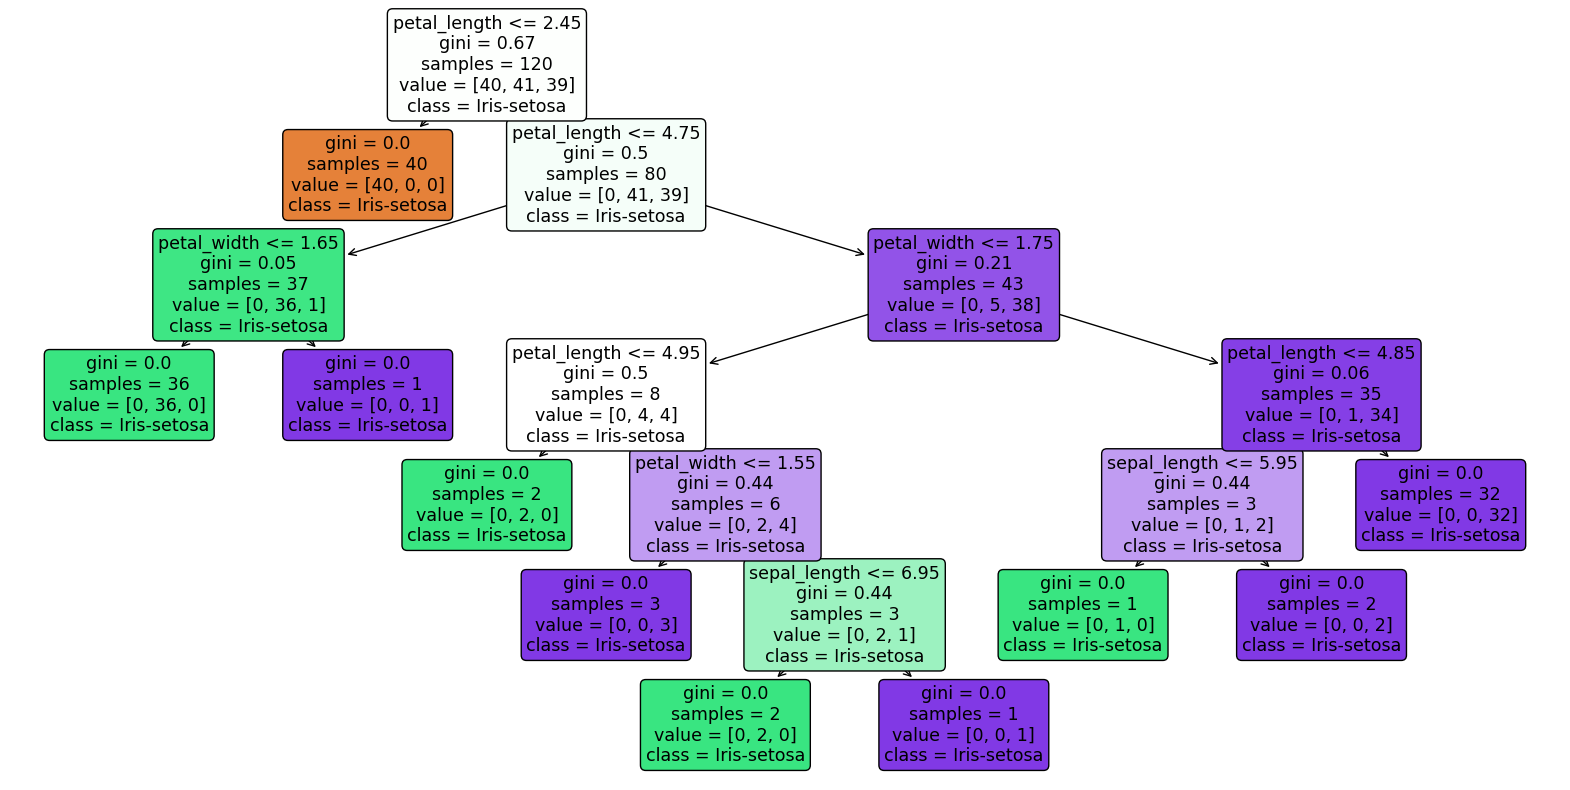

In [36]:
#visualizing the graph
import matplotlib.pyplot as mt
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)
